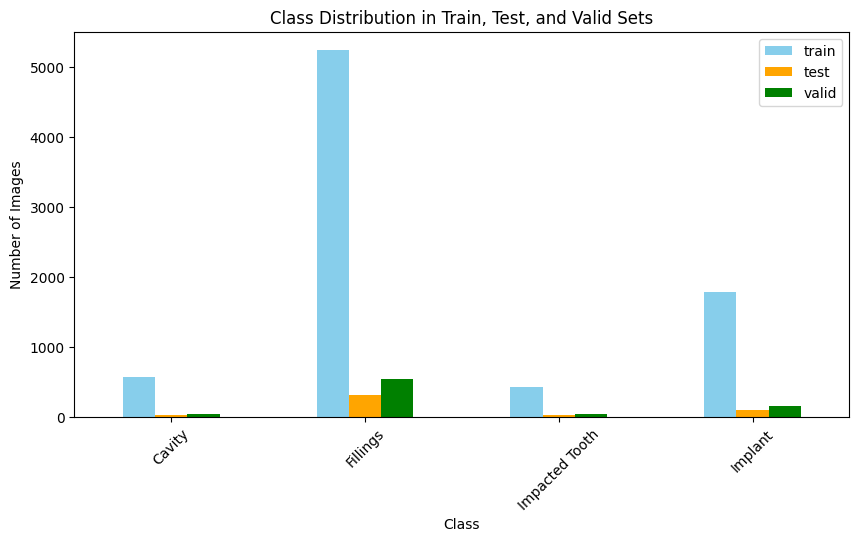

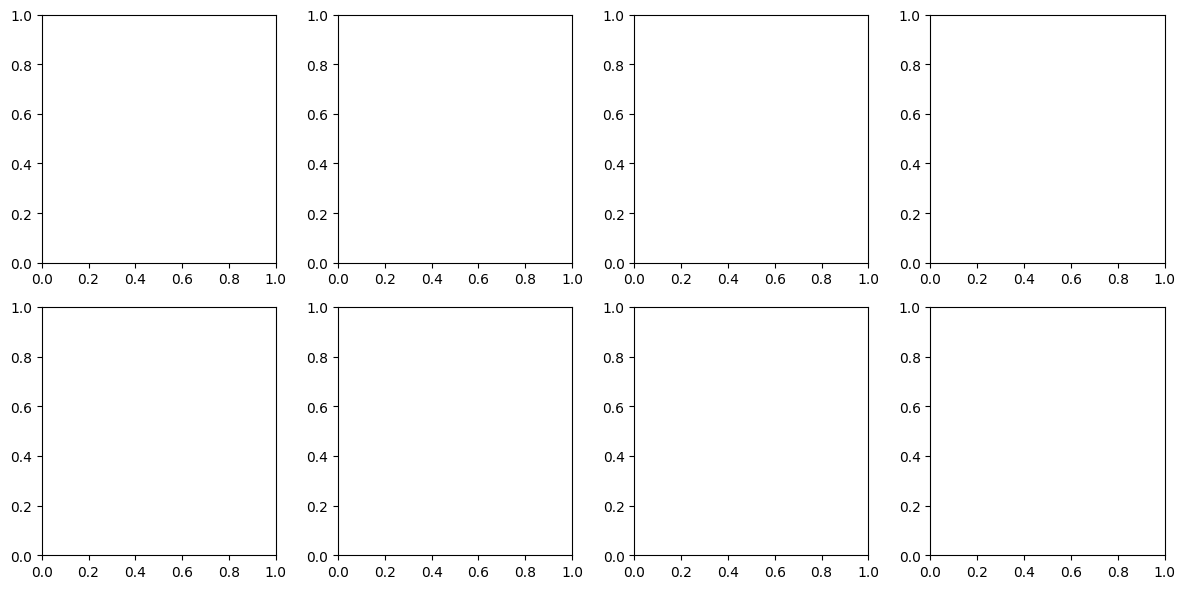

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

# Paths
base_dir = r"D:\Major Project\normalized"

# Function to count images in each class
def analyze_class_distribution():
    class_counts = {}

    for split in ["train", "test", "valid"]:
        split_path = os.path.join(base_dir, split)
        labels_file = os.path.join(split_path, "labels.csv")

        if os.path.exists(labels_file):
            df = pd.read_csv(labels_file)
            class_counts[split] = df["class"].value_counts()

    # Convert to DataFrame for visualization
    class_distribution = pd.DataFrame(class_counts).fillna(0)

    # Plot class distribution
    class_distribution.plot(kind="bar", figsize=(10, 5), color=["skyblue", "orange", "green"])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution in Train, Test, and Valid Sets")
    plt.xticks(rotation=45)
    plt.show()

# Function to visualize sample images
def visualize_sample_images():
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows, 4 columns

    categories = ["fillings", "implants", "cavity", "impacted_tooth"]
    image_samples = {}

    for category in categories:
        class_dir = os.path.join(base_dir, "train", category)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.endswith((".jpg", ".png"))]
            if images:
                image_samples[category] = random.choice(images)

    # Plot images
    for ax, (category, image_file) in zip(axes.ravel(), image_samples.items()):
        img_path = os.path.join(base_dir, "train", category, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax.imshow(img)
        ax.set_title(category)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Run EDA
analyze_class_distribution()
visualize_sample_images()
